In [19]:
import numpy as np
from google.colab import files
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import random

In [20]:
uploaded = files.upload()

Saving input1.txt to input1 (2).txt


In [21]:
file_path = list(uploaded.keys())[0]

In [22]:
text = np.genfromtxt(file_path, skip_header=1, dtype=str)

In [23]:
colors = text[:, 1::3]               # Split rows by taking every third element, starting from the second
colors = np.char.strip(colors, ',')   # Remove commas
colors = colors.astype(np.uint8)      # Convert to integers for pixel values


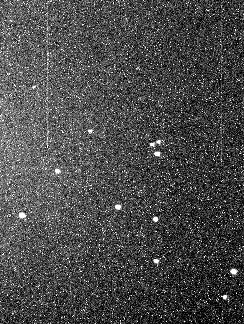

Number of rows: 324
Number of columns: 244


In [25]:
cv2_imshow(colors)
print("Number of rows:", len(colors))
print("Number of columns:", len(colors[0]))

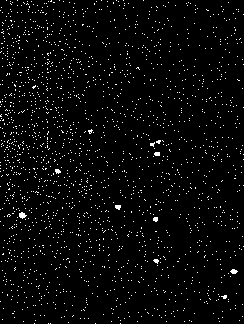

In [26]:
x = random.randint(170,200)
for i in range(324):
  for j in range(244):
    colors = np.where(colors >= x, 255, 0)
    colors = colors.astype(np.uint8)          #make picture binary

cv2_imshow(colors)

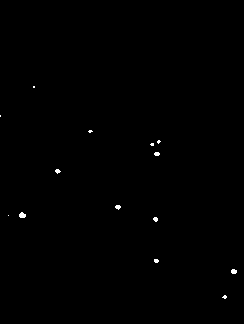

In [27]:
un_noised = cv2.medianBlur(colors, 3)        #destroy noises
cv2_imshow(un_noised)

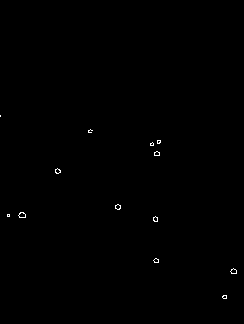

13


In [28]:
detect = cv2.Canny(un_noised, 150, 200)
contours, hierarchy = cv2.findContours(detect,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)          #find stars with their edges
num_stars = len(contours)
cv2_imshow(detect)
print(num_stars)

In [29]:
mean = np.empty((num_stars, 2))

for i in range(num_stars):
  mean[i] = np.array(np.average(contours[i], axis=0), int)            #count center of star

print(mean)

[[224. 296.]
 [233. 271.]
 [155. 260.]
 [155. 218.]
 [  8. 215.]
 [ 21. 214.]
 [117. 206.]
 [ 57. 170.]
 [156. 153.]
 [151. 143.]
 [158. 141.]
 [ 89. 130.]
 [  0. 115.]]
